# Build neighbourhood VDJ feature space

In [1]:
import palantir
import dandelion as ddl

import numpy as np
import seaborn as sns
import os
import pandas as pd
import scanpy as sc
from collections import Counter
ddl.logging.print_header()

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


dandelion==0.3.1 pandas==1.4.4 numpy==1.23.5 matplotlib==3.7.1 networkx==3.1 scipy==1.10.1


In [2]:
import matplotlib.pyplot as plt

In [3]:
# set working directory
os.chdir('/nfs/team205/ny1/ThymusSpatialAtlas/Figure5/VDJ/')
fig_path = '/nfs/team205/ny1/ThymusSpatialAtlas/Figure5/VDJ/figures'

In [4]:
sc.logging.print_header()

/nfs/team205/ny1/miniconda/miniconda3/envs/dandemilo-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


scanpy==1.9.3 anndata==0.9.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.4.4 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


In [5]:
sc.settings.set_figure_params(dpi = 160, color_map = 'RdYlBu_r', dpi_save = 300, format = 'pdf')
plt.rcParams["figure.figsize"] = [6,6]
sns.set_palette('colorblind')

In [6]:
#### need to add this line to restore plotting function of scanpy in the presence of palantir
%matplotlib inline

# Load data

In [ ]:
adata = sc.read('/nfs/team205/ny1/ThymusSpatialAtlas/Figure5/Latest_version/Thymus_Atlas_v17_cite_Tv4_T_lin.h5ad')
adata

In [10]:
adata.obs['annotation_level_3'].value_counts().keys()

CategoricalIndex(['T_DP(Q)', 'T_DP(P)', 'T_αβT(entry)', 'T_CD4', 'T_CD8',
                  'T_DN(CD4)', 'ambiguous', 'T_DP(Q)-early', 'PeriloFb',
                  'EC-Cap', 'T_reg(agonist)', 'T_DP(Q)-HSPH1', 'T_DN(Q)',
                  'T_CD8αα(I)', 'T_DP(Q)-CD99', 'EC-Ven', 'EC-Art', 'T_DN(P)',
                  'cTECI', 'InterloFb', 'T_reg(diff)-FOXP3hi', 'T_SP-HSP',
                  'SMC', 'T_CD8αα(II)', 'mcTEC', 'T_DN(Q)-early',
                  'T_CD8αα(entry)', 'mTECI', 'Pericyte', 'T_NK', 'T_γδT',
                  'T_reg', 'T_DN(CD4)-CD99', 'cTECIII', 'mcTEC-Prolif',
                  'unassigned', 'cTECII', 'T_DN(early)', 'T_CD8-Prolif',
                  'T_reg(diff)-FOXP3Lo', 'T_DN(Q)-CD99', 'TEC-neuro', 'medFb',
                  'RBC', 'B(Q)', 'B-stimulated', 'EC-Cap-Prolif',
                  'InterloFb-COL9A3', 'DC1', 'TEC-myo', 'mTECIII', 'EC-IFI44L',
                  'PeriloFb-Prolif', 'mTECII', 'medFb-RGS5', 'DC-a3',
                  'medFb-PDGFRAlo', 'mTECI-tr

In [18]:
# set up subsets and colors

ct_all_order = ['ETP','T_DN(early)','T_DN(P)','T_DN(Q)-early','T_DN(Q)','T_DN(Q)-CD99','T_DN(CD4)','T_DN(CD4)-CD99',
                'T_DP(P)','T_DP(Q)-early','T_DP(Q)','T_DP(Q)-HSPH1', 'T_DP(Q)-CD99',
                'T_αβT(entry)','T_SP-HSP', 'T_CD4', 'T_CD8', 'T_CD8-Prolif', 
                'T_reg(agonist)', 'T_reg(diff)-FOXP3hi', 'T_reg(diff)-FOXP3Lo','T_reg','T_NK']
                   
ct_color_map = dict(zip(ct_all_order, np.array(sns.color_palette("husl", len(ct_all_order)))[range(len(ct_all_order))]))

# Load abTCR

In [10]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1A9FAZ3_hNgBfsgf4aiZ38Wae4zXyk1y1AgmIp3lFw0o/edit?usp=sharing'
url_1 = sheet_url.replace(‘/edit#gid=’, ‘/export?format=csv&gid=’)
meta = pd.read_csv(url_1)                   
# meta = pd.read_csv('/nfs/team205/ny1/ThymusSpatialAtlas/Figure1/Thymus_SingleCell_data_15122022.csv')

In [11]:
meta = meta[~(meta['path_TCRab'].isna())]
meta

library                     sample  \
2   F64_TH_TOT_5GEX_1            FCAImmP7851890   
3   F64_TH_TOT_5GEX_2            FCAImmP7851891   
6     F45_TH_45P_5GEX            FCAImmP7579230   
7     F45_TH_45N_5GEX            FCAImmP7579231   
8   F67_TH_TOT_5GEX_1            FCAImmP7851892   
9   F67_TH_TOT_5GEX_2            FCAImmP7851893   
10  F67_TH_TOT_5GEX_3            FCAImmP7851894   
11  F67_TH_TOT_5GEX_4            FCAImmP7851895   
12  F67_TH_CD137_5GEX            FCAImmP7851896   
16    F38_TH_45P_5GEX            FCAImmP7528294   
19    F30_TH_45P_5GEX            FCAImmP7292034   
24    F41_TH_45P_5GEX            FCAImmP7555860   
25    F41_TH_45N_5GEX            FCAImmP7555861   
28    F29_TH_45P_5GEX            FCAImmP7292030   
42          TA9260012                 TA9260012   
49  T03_TH_TOT_5GEX_1      T03_TH_TOT_5GEX_1_S1   
50  T03_TH_TOT_5GEX_2      T03_TH_TOT_5GEX_2_S2   
57  T06_TH_TOT_5GEX_1      T06_TH_TOT_5GEX_1_S9   
58  T06_TH_TOT_5GEX_2     T06_TH_TOT_5GEX_2_S10   
59  T06_TH_TOT_5GEX_3     T06_TH_TOT_5GEX_3_S11   
60  T06_TH_TOT_5GEX_4     T06_TH_TOT_5GEX_4_S12   
61          TA9260014                 TA9260014   
79         TA13072429  U48-THY-0-SC-EPCP-2_5GEX   
80         TA13072428  U48-THY-0-SC-EPCP-1_5GEX   
81         TA13072427       U48-THY-0-SC-1_5GEX   
82         TA12571163            U40-THY-0-SC-1   

                                             path_GEX donor        SangerID  \
2   /nfs/team205/vk8/irods_data/09_thymus/cellbend...   F64             NaN   
3   /nfs/team205/vk8/irods_data/09_thymus/cellbend...   F64             NaN   
6   /nfs/team205/vk8/irods_data/09_thymus/cellbend...   F45             NaN   
7   /nfs/team205/vk8/irods_data/09_thymus/cellbend...   F45             NaN   
8   /nfs/team205/vk8/irods_data/09_thymus/cellbend...   F67             NaN   
9   /nfs/team205/vk8/irods_data/09_thymus/cellbend...   F67             NaN   
10  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   F67             NaN   
11  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   F67             NaN   
12  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   F67             NaN   
16  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   F38             NaN   
19  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   F30             NaN   
24  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   F41             NaN   
25  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   F41             NaN   
28  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   F29             NaN   
42  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   U09             NaN   
49  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   T03             NaN   
50  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   T03             NaN   
57  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   T06             NaN   
58  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   T06             NaN   
59  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   T06             NaN   
60  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   T06             NaN   
61  /nfs/team205/vk8/irods_data/09_thymus/cellbend...   Z11             NaN   
79  /nfs/team205/vk8/irods_data/09_thymus/starsolo...   U48  U48-THY-0-SC-1   
80  /nfs/team205/vk8/irods_data/09_thymus/starsolo...   U48  U48-THY-0-SC-1   
81  /nfs/team205/vk8/irods_data/09_thymus/starsolo...   U48  U48-THY-0-SC-1   
82  /nfs/team205/vk8/irods_data/09_thymus/starsolo...   U40  U40-THY-0-SC-1   

   Age1  Age_group2  Sex   sort method  ...  Age2     SampleID_TCRab  \
2   -29       fetal    M    TOT   5GEX  ...   11w     FCAImmP7851882   
3   -29       fetal    M    TOT   5GEX  ...   11w     FCAImmP7851883   
6   -28       fetal  NaN    45P   5GEX  ...   12w     FCAImmP7607608   
7   -28       fetal  NaN    45N   5GEX  ...   12w     FCAImmP7607609   
8   -28       fetal  NaN    TOT   5GEX  ...   12w     FCAImmP7851884   
9   -28       fetal  NaN    TOT   5GEX  ...   12w     FCAImmP7851885 

In [12]:
import os.path
from os import path
from tqdm import tqdm
tcrab = {}
for x, y in tqdm(zip(meta['path_TCRab'], meta['library '])):
    file1 = '/'+x+'/all_contig_annotations.json'
    file2 = '/'+x+'/outs/all_contig_annotations.json'
    
    if path.exists(file1):
        tmp = ddl.read_10x_vdj(file1)
    else: 
        tmp = ddl.read_10x_vdj(file2)
    
    # update cell_id to librarry-barcode
    tmp.data['cell_id']= [y + '-' + z.split('-1')[0] for z in tmp.data['cell_id']]
    ddl.utl.update_metadata(tmp) # update the metadata_names
    # only leave contigs with cell_id in adata
    tmp = tmp[tmp.data['cell_id'].isin(adata.obs_names)].copy()
    
    tcrab[x] = tmp
len(tcrab)

25it [25:11, 100.12s/it]/home/jovyan/my-conda-envs/sc-dandelion/lib/python3.10/site-packages/dandelion/utilities/_core.py:276: UserWarning: 
Dandelion expects .data.index to contain strings, but got values like:
    []
    Inferred to be: empty

/home/jovyan/my-conda-envs/sc-dandelion/lib/python3.10/site-packages/dandelion/utilities/_core.py:276: UserWarning: 
Dandelion expects .metadata.index to contain strings, but got values like:
    []
    Inferred to be: empty

/home/jovyan/my-conda-envs/sc-dandelion/lib/python3.10/site-packages/dandelion/utilities/_utilities.py:560: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/home/jovyan/my-conda-envs/sc-dandelion/lib/python3.10/site-packages/dandelion/utilities/_core.py:276: UserWarning: 
Dandelion expects .data.index to contain strings, but got values like:
    []
    Inferred to be: empty

/home/jovyan/my-conda-envs/sc-dandeli

26

In [13]:
# concatenate
tcrab = ddl.concat([tcrab[x] for x in tcrab], prefixes = list(tcrab.keys()))
tcrab

Dandelion class object with n_obs = 118322 and n_contigs = 322023
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'complete_vdj', 'vj_in_frame', 'junction', 'junction_aa', 'locus', 'v_call', 'j_call', 'c_call', 'd_call', 'consensus_count', 'duplicate_count', 'cdr3_start', 'cdr3_end', 'fwr1_start', 'fwr1_end', 'fwr1', 'fwr1_aa', 'cdr1_start', 'cdr1_end', 'cdr1', 'cdr1_aa', 'fwr2_start', 'fwr2_end', 'fwr2', 'fwr2_aa', 'cdr2_start', 'cdr2_end', 'cdr2', 'cdr2_aa', 'fwr3_start', 'fwr3_end', 'fwr3', 'fwr3_aa', 'fwr4_start', 'fwr4_end', 'fwr4', 'fwr4_aa', 'clone_id', 'raw_consensus_id_10x', 'exact_subclonotype_id_10x', 'high_confidence_10x', 'filtered_10x', 'is_cell_10x', 'is_asm_cell_10x', 'rearrangement_status'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'jun

In [14]:
ddl.tl.transfer(adata, tcrab)

In [19]:
tcrab.data

cell_id  \
sequence_id                                                                            
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  F29_TH_45P_5GEX-AAACCTGAGACAAGCC   
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  F29_TH_45P_5GEX-AAACCTGAGACAAGCC   
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  F29_TH_45P_5GEX-AAACCTGGTAGTAGTA   
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  F29_TH_45P_5GEX-AAACCTGGTAGTAGTA   
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  F29_TH_45P_5GEX-AAACCTGGTAGTAGTA   
...                                                                              ...   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...        TA9260014-TTTGGTTGTTCGTCTC   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...        TA9260014-TTTGGTTGTTCGTCTC   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...        TA9260014-TTTGGTTGTTCGTCTC   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...        TA9260014-TTTGTCAGTCGCATAT   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...        TA9260014-TTTGTCAGTCGCATAT   

                                                                                          sequence_id  \
sequence_id                                                                                             
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F2...   
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F2...   
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F2...   
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F2...   
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F2...   
...                                                                                               ...   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...  warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_...   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...  warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_...   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...  warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_...   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...  warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_...   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...  warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_...   

                                                                                             sequence  \
sequence_id                                                                                             
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  TTATATGGGGATGCTCACAGAGGGCCTGGTCTAGAATATTCCACAT...   
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  GGGGCCCTTCTTGGCTCATCCTCCCTCTTATGTGCATGGCTCTGCC...   
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  GTAGCTCGTTGATGTCTGTGTGGATAGGGAGCTGTGACGAGAGCAA...   
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  AGAATGACGCCCTTGAAAGACGTGTTCCCTTTTCACCAATGCACAG...   
warehouse/cellgeni/tic-1144/E-MTAB-8581/VDJ/F29...  AGAATGACGCCCTTGAAAGACGTGTTCCCTTTTCACCAATGCACAG...   
...                                                                                               ...   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...  CCTTTTCACCAATGCACAGACCCAGAGGACCCCTCCATCCTGCAGT...   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...  AGTCAACTTCTGGGAGCAGATCTCTGCAGAATAAAAATGAAAAAGC...   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...  TGGGAAACAGAATGGCTTTTTGGCTGAGAAGGCTGGGTCTACATTT...   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...  TATCACCACTCACTTTCTTTTTTGGGGATCCTTCCCTGACCCTGCC...   
warehouse/cellgeni/tic-1144/New_VDJ/TA9260023_v...  GAGAAGCCTCACACAGCCCAGTAACTTTGCTAGTACCTCTTGAGTG...   

                                                                                          sequence_aa  \
sequence_id                                                                                    

In [16]:
# library_type is set to filter out genes that are not TRA/TRB (in 'locus' column) as this library is abTCR
tcrab.data['sequence_alignment'] = tcrab.data['sequence']
tcrab_checked, trab_adata = ddl.pp.check_contigs(tcrab, adata, productive_only = False, library_type = 'tr-ab')
tcrab_checked

Preparing data: 322020it [01:24, 3789.61it/s]
Scanning for poor quality/ambiguous contigs:  40%|████      | 47349/118321 [03:56<06:16, 188.52it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Filter cells

In [20]:
# only take samples that had TCR sequencing done
adata_abtcr = trab_adata[~(trab_adata.obs['path_TCRab'].isna())].copy()
adata_abtcr

AnnData object with n_obs × n_vars = 126034 × 36751
    obs: 'n_genes', 'sample_barcode', 'batch', 'chemistry', 'age_group', 'age_numeric', 'sampleID_TCRab', 'path_TCRab', 'type', 'study', 'sample', 'enrichment', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'barcode_sequence', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'louvian_1', 'louvian_05', 'latent_cell_probability', 'latent_RT_efficiency', 'log1p_n_counts', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_r

In [23]:
adata

AnnData object with n_obs × n_vars = 520808 × 36751
    obs: 'n_genes', 'sample_barcode', 'batch', 'chemistry', 'age_group', 'age_numeric', 'sampleID_TCRab', 'path_TCRab', 'type', 'study', 'sample', 'enrichment', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'barcode_sequence', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'louvian_1', 'louvian_05', 'latent_cell_probability', 'latent_RT_efficiency', 'log1p_n_counts', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_r

In [21]:
adata_abtcr.write('/nfs/team205/ny1/ThymusSpatialAtlas/Figure1/Thymus_Atlas_v15_abTCR.h5ad')

In [11]:
adata_abtcr = sc.read('/nfs/team205/ny1/ThymusSpatialAtlas/Figure3/VDJ/Thymus_Atlas_v15_abTCR.h5ad')

In [19]:
plt.rcParams["figure.figsize"] = [20,20]
plt.rcParams['font.family'] = 'sans-serif'

## Subset cells to dp onwards, and cells with paired TCRab

In [33]:
ct_order = ['T_DP(P)','T_DP(Q)-early','T_DP(Q)','T_DP(Q)-HSPH1', 'T_DP(Q)-CD99',
                'T_αβT(entry)', 'T_CD4', 'T_CD8']
                   
ct_color_map = dict(zip(ct_order, np.array(sns.color_palette("husl", len(ct_order)))[range(len(ct_order))]))


# subset cells to celltypes within ct_order
bdata = adata_abtcr[adata_abtcr.obs['annotation_level_3'].isin(ct_order)]
# filter out cells without any contig
for chain in ['v_call_abT_VDJ_main', 'j_call_abT_VDJ_main','v_call_abT_VJ_main', 'j_call_abT_VJ_main']:
    bdata.obs[chain] = bdata.obs[chain].astype('str')
# change all entries with ',' (inconfident mappings) to 'None'
for cell in bdata.obs_names:
    for chain in ['v_call_abT_VDJ_main', 'j_call_abT_VDJ_main','v_call_abT_VJ_main', 'j_call_abT_VJ_main']:
        gene = bdata.obs.loc[cell, chain]
        if ',' in gene or gene =='None' or gene =='' or gene=='No_contig':
            bdata.obs.loc[cell, chain] = chain+'_None'

/tmp/ipykernel_4524/631201297.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


In [34]:
# option for DP onwards - only leave cells with all 4 chains
bdata = bdata[~(np.array(bdata.obs['v_call_abT_VDJ_main'].str.endswith('None')) | np.array(bdata.obs['j_call_abT_VDJ_main'].str.endswith('None')) |
np.array(bdata.obs['v_call_abT_VJ_main'].str.endswith('None')) | np.array(bdata.obs['j_call_abT_VJ_main'].str.endswith('None')))]

In [35]:
bdata

View of AnnData object with n_obs × n_vars = 46085 × 36751
    obs: 'n_genes', 'sample_barcode', 'batch', 'chemistry', 'age_group', 'age_numeric', 'sampleID_TCRab', 'path_TCRab', 'type', 'study', 'sample', 'enrichment', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'barcode_sequence', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'louvian_1', 'louvian_05', 'latent_cell_probability', 'latent_RT_efficiency', 'log1p_n_counts', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_coun

# Select neighbourhoods 

In [64]:
## need to redo neighborhood graph after subsetting cells before milo
# n_neighbors decides the minimum neighbourhood size 
# here use_rep = 'X_scvi' as data integration was done using scVI
sc.pp.neighbors(bdata, use_rep = "X_scVI", n_neighbors = 100)
sc.tl.umap(bdata, random_state = 1712)

In [65]:
# take a look at the UMAP to make sure it looks reasonable i.e. different cell types are clustered separately
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [5.5,5]
sc.pl.umap(bdata, color=['annotation_level_3'], palette = ct_color_map, legend_loc = 'right margin', legend_fontsize=10)

In [68]:
import milopy
import milopy.core as milo

# use milo to sample neighbourhood
milo.make_nhoods(bdata)
# build neighbourhood adata in bdata.uns['nhood_adata']
milo.count_nhoods(bdata, sample_col='Sample') # this step is needed to build bdata.uns['nhood_adata'] and sample_col can be anything
# this step is needed for plotting below
milopy.utils.build_nhood_graph(bdata)
# assign neighbourhood celltype by majority voting
# results are in bdata.uns['nhood_adata'].obs['nhood_annotation'] & bdata.uns['nhood_adata'].obs['nhood_annotation_frac'] 
milopy.utils.annotate_nhoods(bdata, anno_col='annotation_level_3')
bdata

/home/jovyan/my-conda-envs/sc-dandelion/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.


AnnData object with n_obs × n_vars = 44684 × 36751
    obs: 'n_genes', 'sample_barcode', 'batch', 'chemistry', 'age_group', 'age_numeric', 'sampleID_TCRab', 'path_TCRab', 'type', 'study', 'sample', 'enrichment', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'barcode_sequence', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'louvian_1', 'louvian_05', 'latent_cell_probability', 'latent_RT_efficiency', 'log1p_n_counts', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_ra

Now neighbourhood adata is stored in bdata.uns['nhood_adata']

# Create neighbourhood VDJ feature space

In [69]:
#### this option for DP
# function for making neighbourhood vdj feature space
nhood_adata = ddl.tl.vdj_pseudobulk(bdata, pbs = bdata.obsm['nhoods'], obs_to_take = 'annotation_level_3', extract_cols=['v_call_abT_VDJ_main', 'j_call_abT_VDJ_main','v_call_abT_VJ_main', 'j_call_abT_VJ_main'])
nhood_adata

/home/jovyan/my-conda-envs/sc-dandelion/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.


AnnData object with n_obs × n_vars = 2763 × 164
    obs: 'annotation_level_3', 'annotation_level_3_fraction', 'cell_count'
    obsm: 'pbs'

     nhood_adata is the new neighbourhood VDJ feature space, whereby each observation is a cell neighbourhood
     VDJ usage frequency stored in nhood_adata.X
     VDJ genes stored in nhood_adata.var
     neighbourhood metadata stored in nhood_adata.obs
     can visualise the data using PCA or UMAP (see below)

In [70]:
# # sort out the annotation colour order
nhood_adata.obs['annotation_level_3'] = nhood_adata.obs['annotation_level_3'].astype('category')
nhood_adata.obs['annotation_level_3'] = nhood_adata.obs['annotation_level_3'].cat.reorder_categories(ct_order)

## Run Pseudotime on VDJ feature space

In [73]:
# make sure you install palantir if you don't already have it

# Run diffusion maps
pca_projections = pd.DataFrame(nhood_adata.obsm['X_pca'], index=nhood_adata.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=10)
dm_res

Determing nearest neighbor graph...


{'T': <2763x2763 sparse matrix of type '<class 'numpy.float64'>'
 	with 123662 stored elements in Compressed Sparse Row format>,
 'EigenVectors':              0         1         2         3         4         5         6  \
 0    -0.019024 -0.036484 -0.006213  0.006654  0.004738 -0.001153 -0.014042   
 1    -0.019024 -0.038937 -0.008598  0.012025  0.009558  0.008855  0.016716   
 2    -0.019024 -0.038136 -0.007684  0.009638  0.007331  0.001469 -0.015119   
 3    -0.019024 -0.037652 -0.007121  0.008135  0.005929 -0.003381 -0.036697   
 4    -0.019024 -0.037723 -0.007190  0.008281  0.006056 -0.003434 -0.039188   
 ...        ...       ...       ...       ...       ...       ...       ...   
 2758 -0.019024  0.010537  0.014592  0.015137 -0.000562  0.010898 -0.011066   
 2759 -0.019024  0.012273 -0.001627  0.001922  0.014632 -0.000830 -0.017172   
 2760 -0.019024  0.009821  0.021592  0.015848 -0.000452  0.020161 -0.015019   
 2761 -0.019024  0.012408 -0.009742 -0.013302  0.025968 -0.004981

In [75]:
# based on plot above, choose n_eigs
ms_data = palantir.utils.determine_multiscale_space(dm_res, n_eigs=5)

In [76]:
# for DN only
#plt.rcParams["figure.figsize"] = [4,4]
#sc.pl.umap(nhood_adata, color=[col + '_None' for col in cols],color_map = 'RdYlBu_r')

In [80]:
# select the start and end points
# start
tmp = nhood_adata[nhood_adata.obs['annotation_level_3'] == 'T_DP(P)']
#tmp = nhood_adata[nhood_adata.obs['mapping_anno_v3'] == 'DN(early)']
rootcell = np.argmax(tmp.obsm['X_umap'][:,1])
rootcell = tmp.obs_names[rootcell]
nhood_adata.obs['rootcell'] = 0
nhood_adata.obs.loc[rootcell,'rootcell'] = 1

In [85]:
# ends
tmp1 = nhood_adata[nhood_adata.obs['annotation_level_3'] == 'T_CD8']
tmp2 = nhood_adata[nhood_adata.obs['annotation_level_3'] == 'T_CD4']
endcell1 = np.argmax(tmp1.obsm['X_umap'][:,0])
endcell1 = tmp1.obs_names[endcell1]
endcell2 = np.argmax(tmp2.obsm['X_umap'][0,:])
endcell2 = tmp2.obs_names[endcell2]

terminal_states = pd.Series(['T_CD8', 'T_CD4'], 
                           index=[endcell1,endcell2])

In [86]:
# plot rootcell and terminal states
nhood_adata.obs['terminal_states'] = 0
nhood_adata.obs.loc[terminal_states.index, 'terminal_states'] = 1
plt.rcParams["figure.figsize"] = [4,4]
sc.pl.umap(nhood_adata,color=['rootcell','terminal_states','annotation_level_3'],
           title=['root cell','terminal states','nhood annotation'],color_map='OrRd')

In [87]:
pr_res = palantir.core.run_palantir(ms_data,  rootcell, num_waypoints=500, 
                                    terminal_states = terminal_states.index)

Sampling and flocking waypoints...
Time for determining waypoints: 0.0024295767148335774 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back t

Time for shortest paths: 0.12917419274648032 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


/home/jovyan/my-conda-envs/sc-dandelion/lib/python3.10/site-packages/palantir/core.py:447: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/jovyan/my-conda-envs/sc-dandelion/lib/python3.10/site-packages/palantir/core.py:450: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [88]:
pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]

## Visualise the data

In [89]:
ddl.tl.pseudotime_transfer(adata = nhood_adata, pr_res = pr_res, suffix = '_nhood_vdj')

AnnData object with n_obs × n_vars = 2763 × 164
    obs: 'annotation_level_3', 'annotation_level_3_fraction', 'cell_count', 'rootcell', 'terminal_states', 'pseudotime_nhood_vdj', 'prob_T_CD8_nhood_vdj', 'prob_T_CD4_nhood_vdj'
    uns: 'pca', 'annotation_level_3_colors', 'neighbors', 'umap'
    obsm: 'pbs', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [90]:
plt.rcParams["figure.figsize"] = [4,4]
plot = ['pseudotime', 'prob_T_CD8', 'prob_T_CD4']
sc.pl.umap(nhood_adata,color=[term + '_nhood_vdj' for term in plot],
           title=['pseudotime','branch probability to T_CD8',
                  'branch probability to T_CD4'],
           frameon=False,wspace=0.1,
           color_map = 'RdYlBu_r'
          )

## Project pseudotime and branch probabilities back to cells

In [123]:
# project the nhood level pseudotime to cell level pseudotime.
cdata = ddl.tl.project_pseudotime_to_cell(adata = bdata, 
                               pb_adata = nhood_adata, 
                               term_states=['T_CD8','T_CD4'], 
                               suffix = '_nhood_vdj')

number of cells removed due to not belonging to any neighbourhood 12


In [124]:
sc.pl.umap(cdata, 
           color=[term + '_nhood_vdj' for term in plot]+['annotation_level_3'],
           color_map = 'RdYlBu_r')

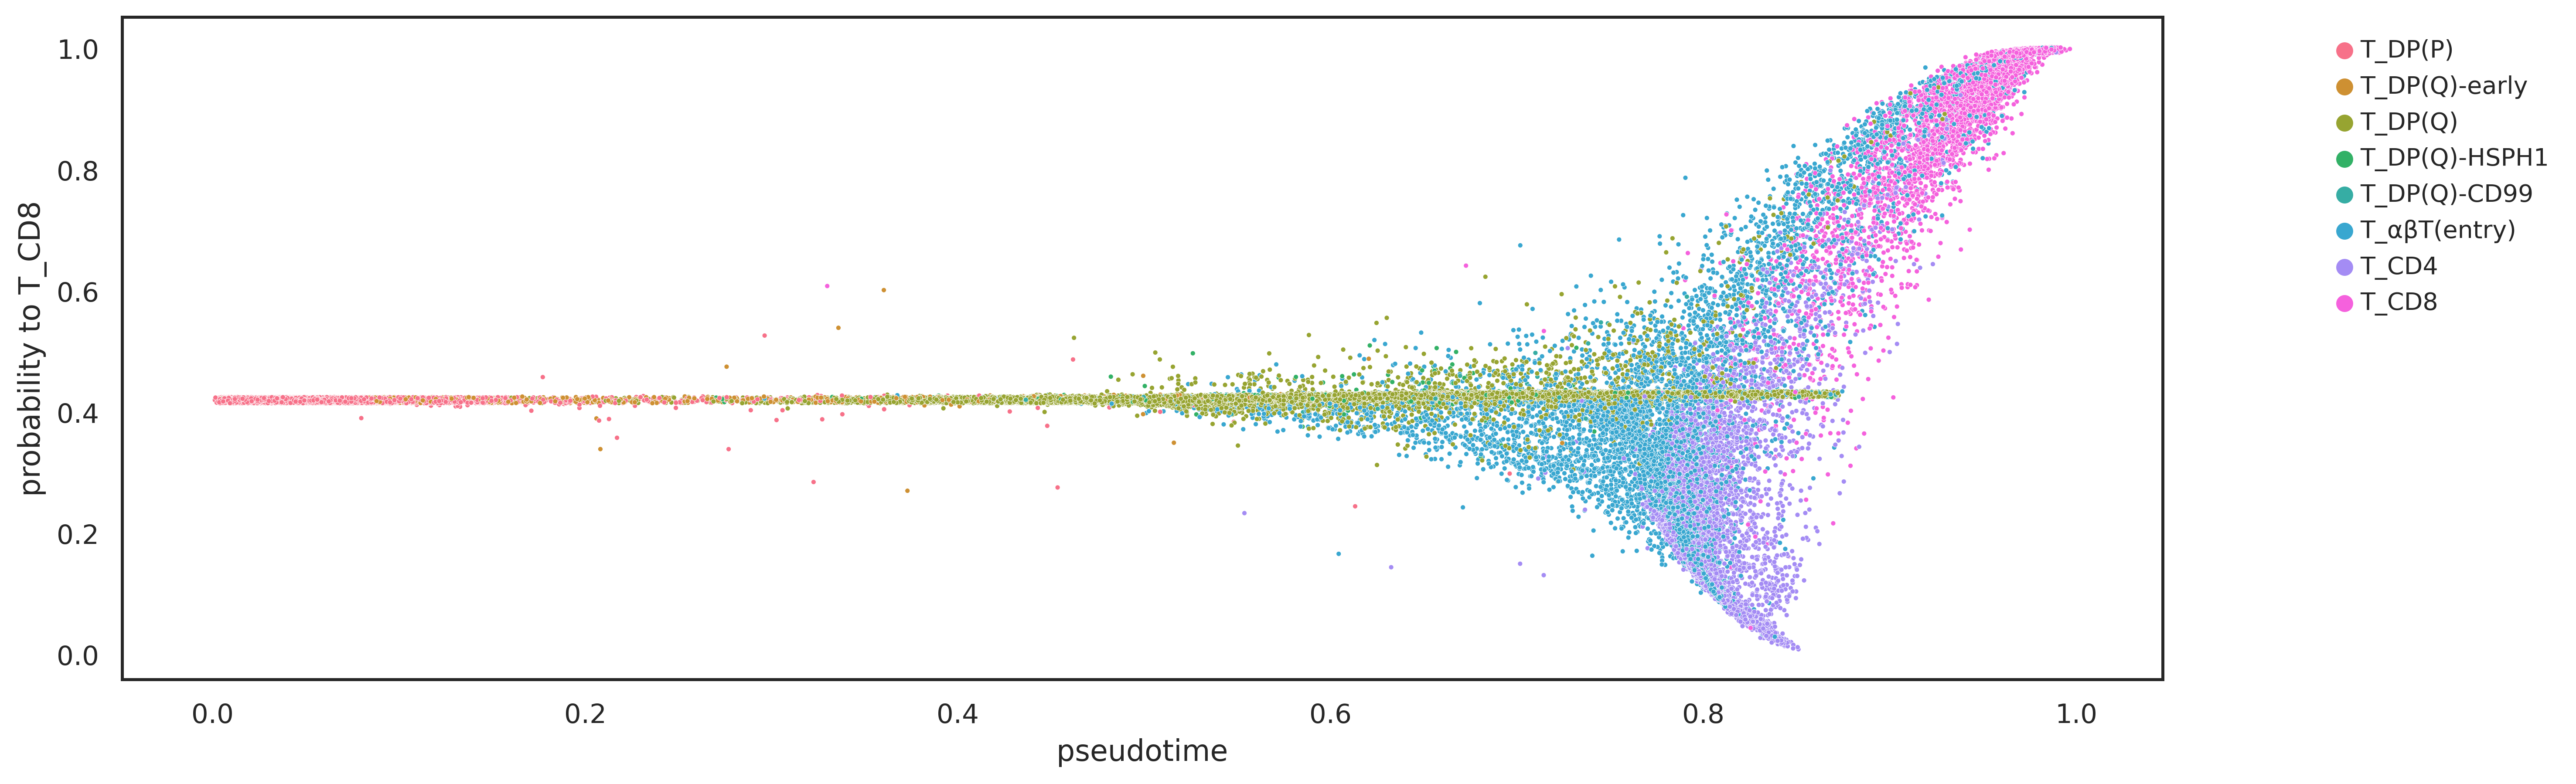

In [162]:
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(15,5))
cdata.obs['annotation_level_3'] = cdata.obs['annotation_level_3'].cat.reorder_categories(ct_order)
df = cdata.obs.copy()
sigma = 0.01
df['prob_T_CD8_nhood_vdj'] = df['prob_T_CD8_nhood_vdj'] + (np.random.rand(len(df['prob_T_CD8_nhood_vdj']))-0.5)*sigma
ax= sns.scatterplot(data=df, 
                    x ='pseudotime_nhood_vdj',
                    y='prob_T_CD8_nhood_vdj',
                    s=4,
                    hue='annotation_level_3',
                    palette = ct_color_map)
ax.set_ylabel('probability to T_CD8')    
ax.set_xlabel('pseudotime')
ax.set_title('')
h,l = ax.get_legend_handles_labels()
l1 = ax.legend(h[:10],l[:10], loc='upper right',bbox_to_anchor=(1.2, 1),frameon=False, fontsize='small')
plt.savefig(fig_path+'/pseudotime_scatterplot_nhood_vdj.pdf',bbox_inches='tight')

In [150]:
cdata.obs['annotation_level_3']

barcode
F64_TH_TOT_5GEX_1-CCTTTCTAGCGAGAAA         T_DP(P)
F64_TH_TOT_5GEX_1-CAGTAACAGCACAGGT         T_DP(P)
F64_TH_TOT_5GEX_1-GACGCGTAGAACAACT         T_DP(P)
F64_TH_TOT_5GEX_1-GGATTACGTGTCCTCT         T_DP(P)
F64_TH_TOT_5GEX_1-CGCTTCAAGCGATAGC         T_DP(P)
                                          ...     
TA13072427-CAGAGAGTCGTGACAT                  T_CD4
TA13072427-ATGAGGGCAGTCGTGC                T_DP(Q)
TA13072427-CTACGTCCACCCATGG                T_DP(Q)
TA13072427-CGTCACTTCTCGAGTA                T_DP(Q)
TA13072427-CGTAGCGGTGTGTGCC           T_αβT(entry)
Name: annotation_level_3, Length: 44672, dtype: category
Categories (8, object): ['T_DP(P)', 'T_DP(Q)-early', 'T_DP(Q)', 'T_DP(Q)-HSPH1', 'T_DP(Q)-CD99', 'T_αβT(entry)', 'T_CD4', 'T_CD8']

/tmp/ipykernel_4524/3698670722.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


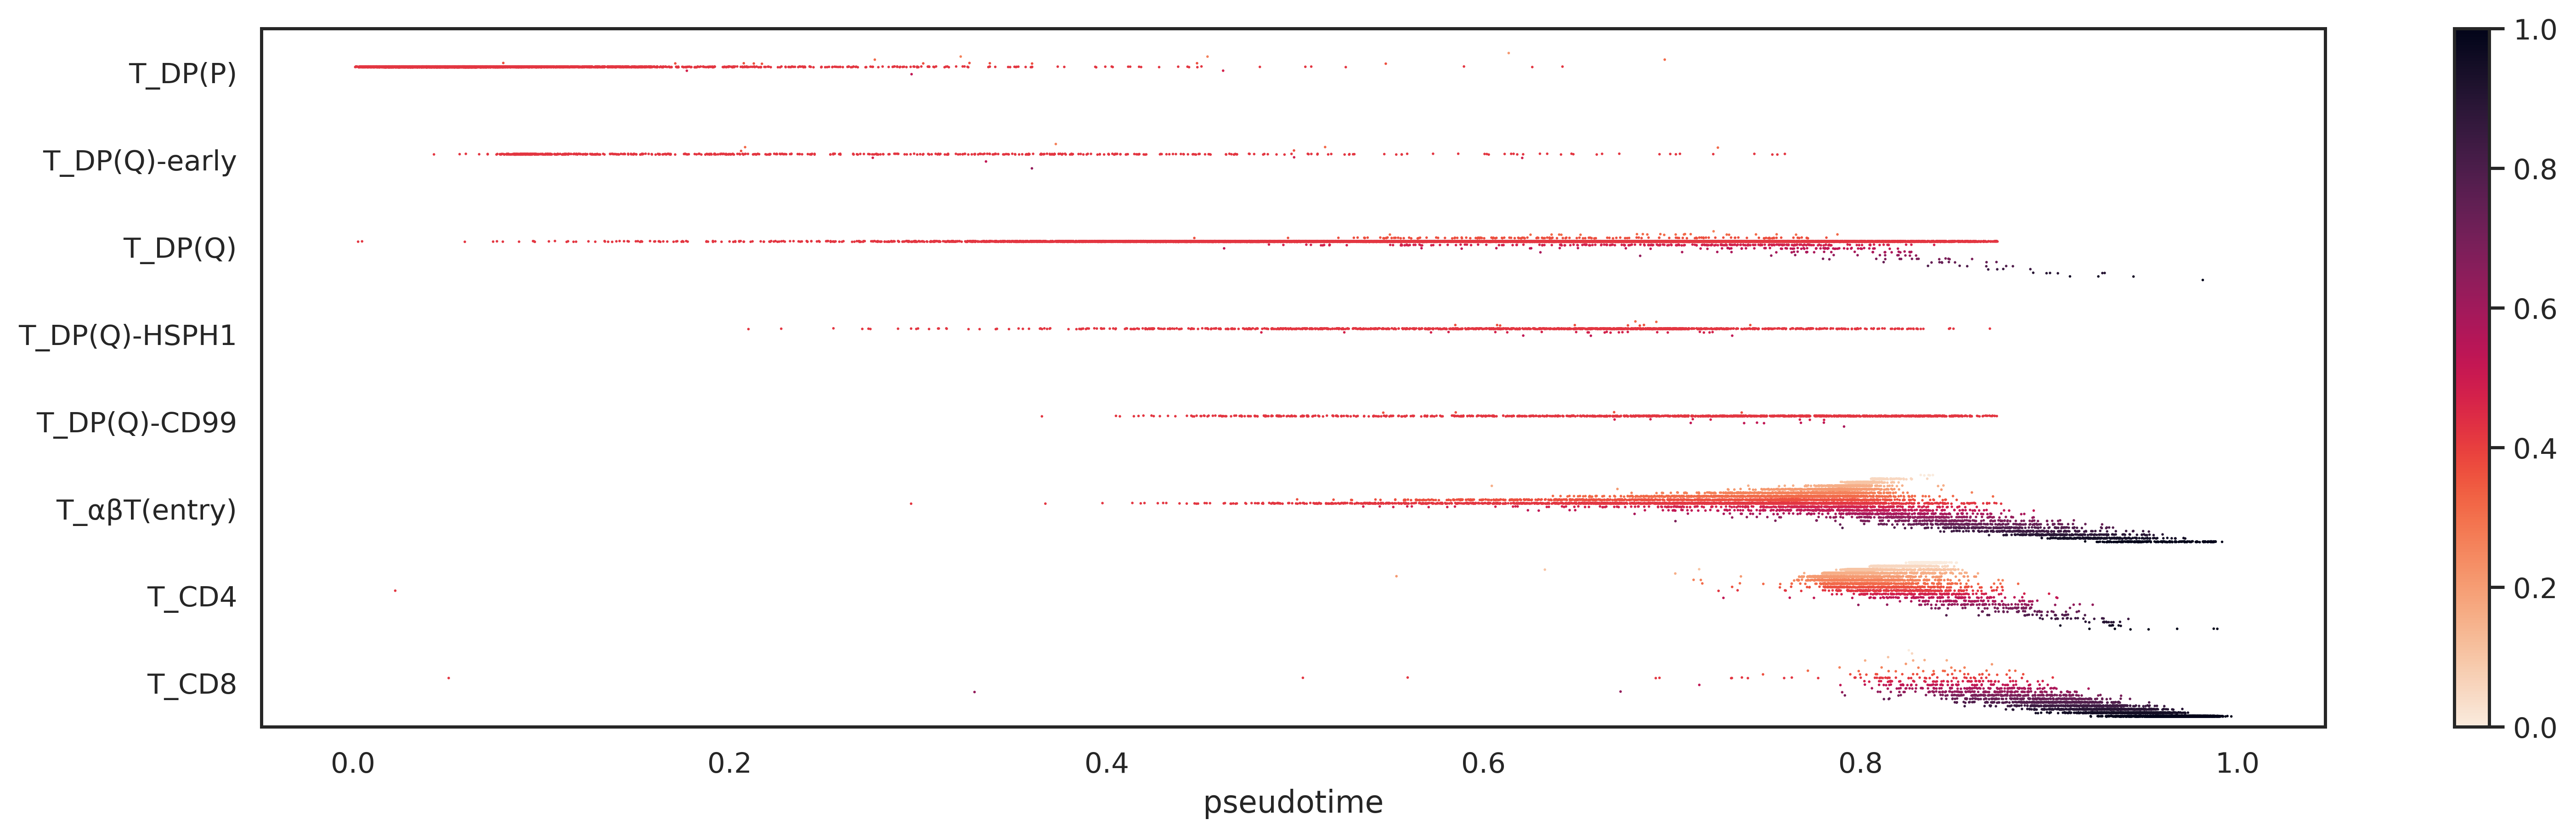

In [167]:
bins = np.linspace(start=0, stop=1, num=21)[1:]
cdata.obs["prob_T_CD8_nhood_vdj_bin"]=np.digitize(cdata.obs["prob_T_CD8_nhood_vdj"], bins, right=True)

fig, ax = plt.subplots(figsize=(18,5))

# plot color bar
norm = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap="rocket_r", norm=norm)
sm.set_array([])

ax=sns.stripplot(data=cdata.obs, x="pseudotime_nhood_vdj", y="annotation_level_3", hue="prob_T_CD8_nhood_vdj_bin",
                   palette='rocket_r',dodge=True, size=1)
ax.set_ylabel('')    
ax.set_xlabel('pseudotime')
ax.set_title('')
ax.get_legend().remove()
ax.figure.colorbar(sm)

#plt.savefig(fig_path+'vdj_pseudotime_stripplot.pdf',bbox_inches='tight')

In [96]:
# DP to SPT, combined option
cdata.uns['nhood_adata'].uns['annotation_labels'] = np.nan
cdata.write('/nfs/team205/ny1/ThymusSpatialAtlas/Figure3/VDJ/DP_combined_pseudotime.h5ad')
cdata

# look at the TRAV/J expression in DP(Q) that are beyond the bifurcation point

In [21]:
# look at TRAV/TRAJ expression 
bulk_adata = ddl.tl.vdj_pseudobulk(adata = cdata, obs_to_bulk = ['annotation_level_3'], obs_to_take = ['annotation_level_3'],
                                   extract_cols= ['v_call_abT_VDJ_main', 'j_call_abT_VDJ_main','v_call_abT_VJ_main', 'j_call_abT_VJ_main'])

/home/jovyan/my-conda-envs/sc-dandelion/lib/python3.10/site-packages/dandelion/tools/_trajectory.py:396: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/jovyan/my-conda-envs/sc-dandelion/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.


In [22]:
# load TCR list by location - lists in github folder metadata/TCR_genes
TCR_list_by_loc_dict = {}
for chain in ['TRAV','TRAJ']:
    path = '/lustre/scratch117/cellgen/team205/cs42/VDJ_collab_manuscript/gene_list/'+chain+'_list_by_location.csv'
    TCR_list_by_loc_dict[chain] = list(pd.read_csv(path, header=None)[0])

In [23]:
gene_intersection = [gene for gene in TCR_list_by_loc_dict['TRAV'] if gene in bulk_adata.var_names] +[gene for gene in TCR_list_by_loc_dict['TRAJ'] if gene in bulk_adata.var_names] 
trav = pd.DataFrame(index = bulk_adata.obs['annotation_level_3'], columns = gene_intersection,
                    data = bulk_adata[:,gene_intersection].X)
trav = trav

In [26]:
trav = trav.reindex(['T_DP(P)','T_DP(Q)-early','T_alpha_vj_init','T_alpha_vj_inter','T_alpha_vj_adv','T_alpha_vj_late','T_DP(Q)-HSPH1','T_DP(Q)-CD99','T_αβT(entry)','T_αβT(entry)_CD4','T_αβT(entry)_CD8', 'T_CD4','T_CD8'])
# trav = trav.reindex(['T_DP(P)','T_DP(Q)-early', 'T_DP(Q)', 'T_DP(Q)-HSPH1','T_DP(Q)-CD99','T_DP_late','T_αβT(entry)','T_αβT(entry)_CD4', 'T_CD4','T_αβT(entry)_CD8','T_CD8'])

In [28]:
fig_path

'/nfs/team205/ny1/ThymusSpatialAtlas/Figure3/VDJ/figures'

<AxesSubplot: ylabel='anno_pseudotime_bin'>

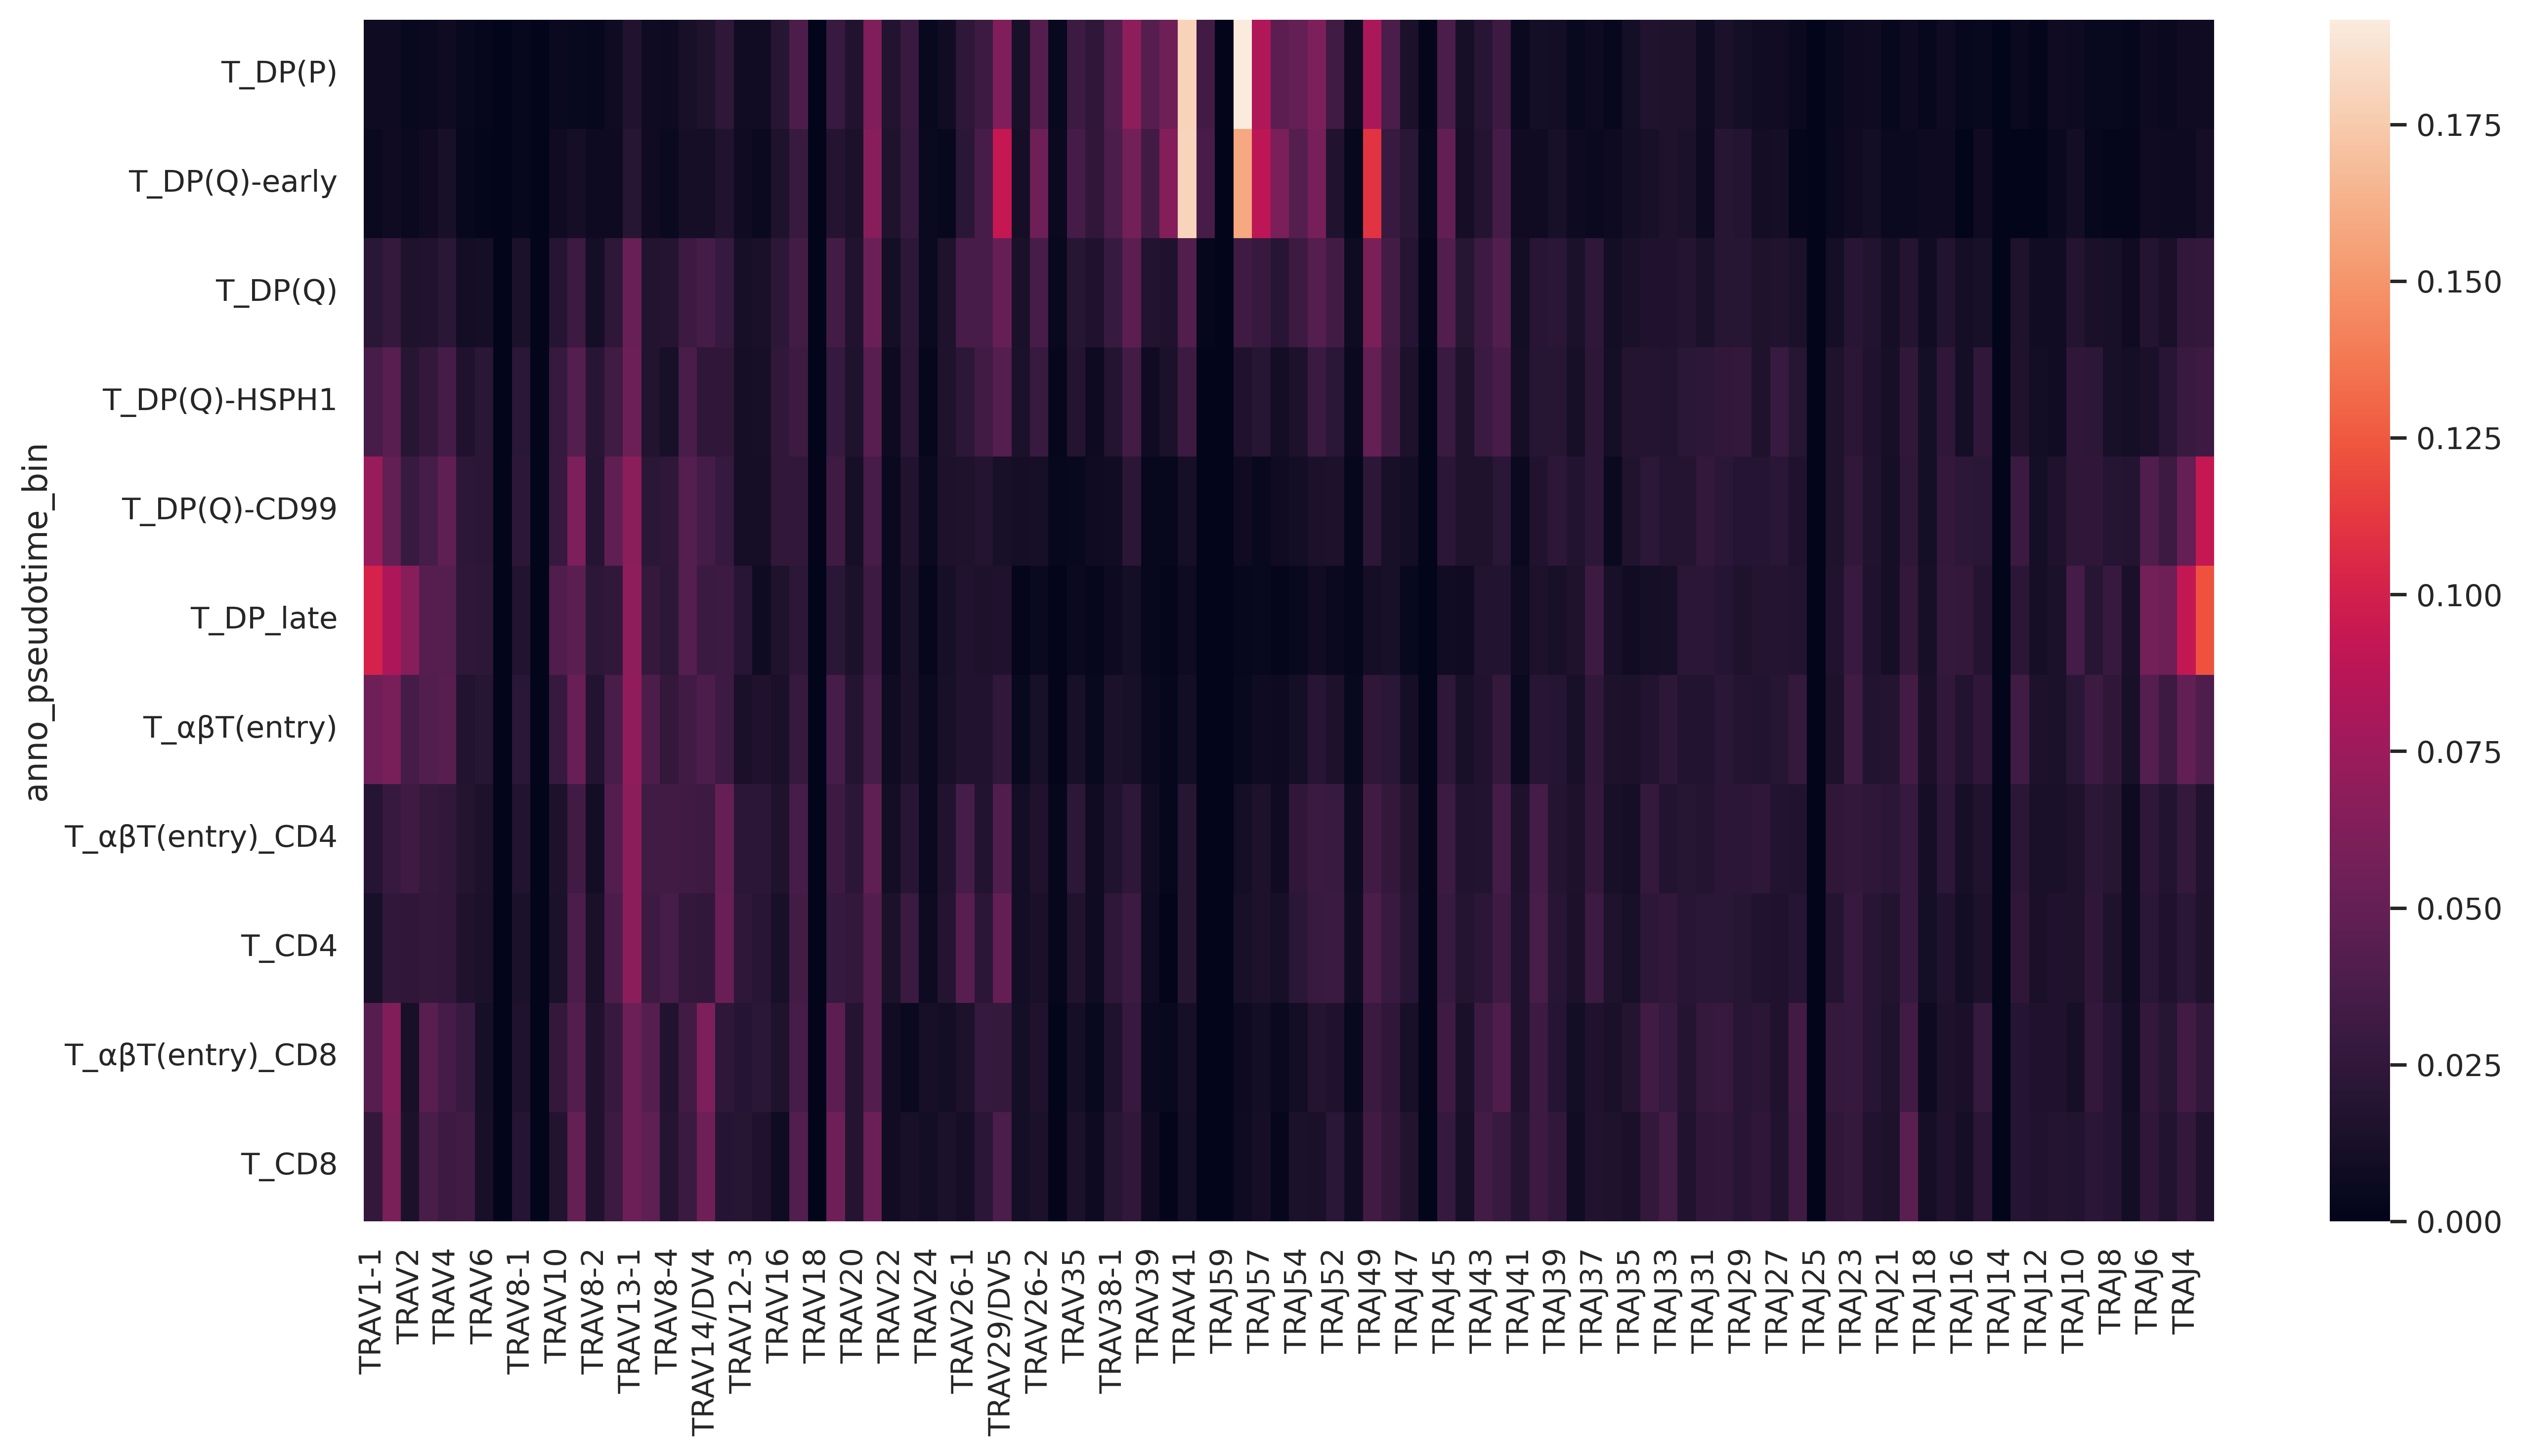

In [108]:
plt.rcParams["figure.figsize"] = [15,8]
sns.heatmap(trav)
# DP_late is using the end of TRAV/TRAJ

In [65]:
# generate some vdj plots 

In [172]:
adata = adata[adata.obs['annotation_level_3'].isin(ct_order)]

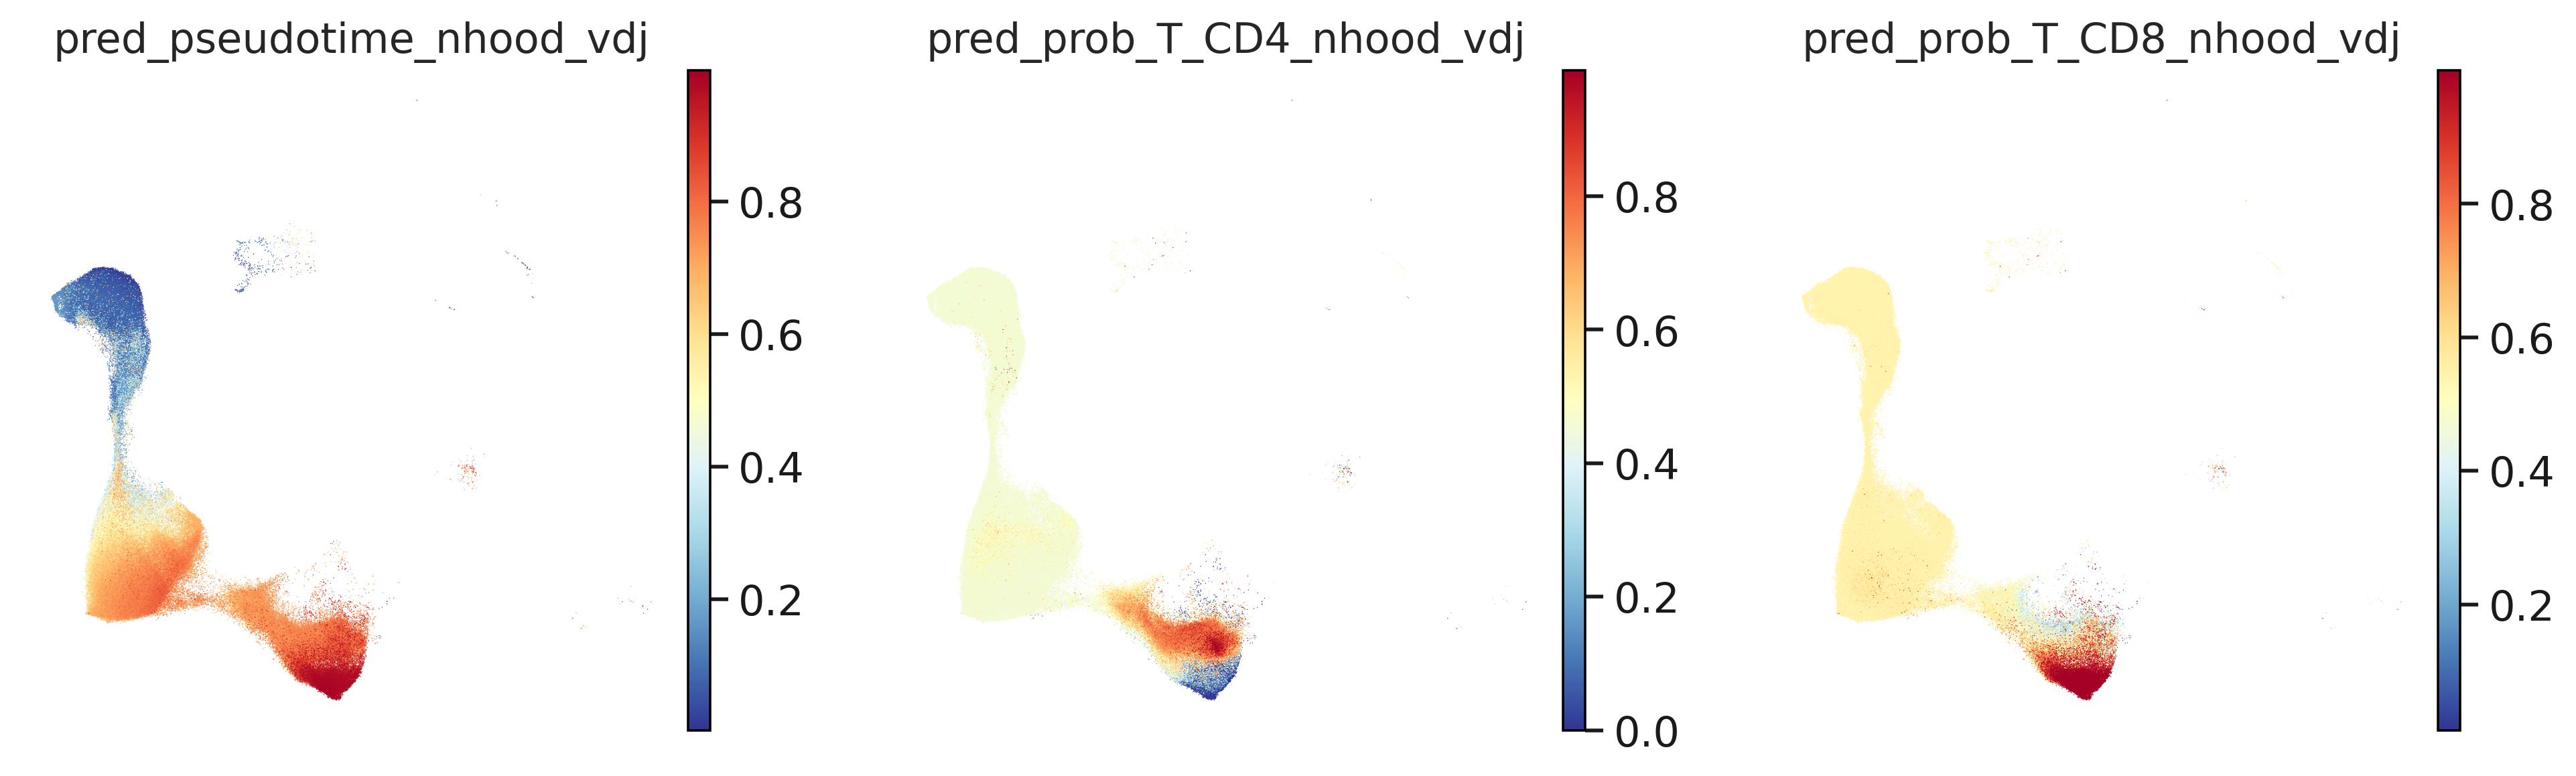

In [174]:
sc.settings.set_figure_params(dpi = 160, color_map = 'RdYlBu_r', dpi_save = 300, format = 'pdf')
sc.pl.umap(adata, color=['pseudotime_nhood_vdj','prob_T_CD4_nhood_vdj','prob_T_CD8_nhood_vdj'],legend_loc='on data',frameon=False)